# Does faculty salary vary by gender and/or rank?

## Set up

Before getting started, the only addtional library you should have to install (that did not come with the anaconda python distribution) is `seaborn`, a package for visualization:

```
pip install seaborn
```

Let's begin by reading in some data from [this course website](http://data.princeton.edu/wws509/datasets/#salary). Columns included are:

- **sx** = Sex, coded 1 for female and 0 for male
- **rk** = Rank, coded
    - 1 for assistant professor,
    - 2 for associate professor, and
    - 3 for full professor
- **yr** = Number of years in current rank
- **dg** = Highest degree, coded 1 if doctorate, 0 if masters
- **yd** = Number of years since highest degree was earned
- **sl** = Academic year salary, in dollars.

In [3]:
# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from urllib.request import urlopen
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt # plotting
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline 

In [5]:
# Read data from URL
file = urlopen('http://data.princeton.edu/wws509/datasets/salary.dat')
data = file.read().decode('utf-8').splitlines()
headers = data[0]
df = pd.DataFrame(l.rstrip().split() for l in data[1:])
df.columns = headers.rstrip().split()
df['sl'] = df['sl'].astype(float) # Make sure salary is float
df['yr'] = df['yr'].astype(int) # Make sure year is int is float
df['yd'] = df['yd'].astype(int) # Make sure salary is float

## Descriptive statistics by gender

Before doing any statistical tests, you should get a basic feel for the gender breakdown in your dataset

In [6]:
# Number of males/females in the dataset
df.groupby('sx').size()

sx
female    14
male      38
dtype: int64

In [7]:
# Mean salary by sex
df[['sx', 'sl']].groupby('sx').agg('mean')

,sl
sx,
female,21357.142857
male,24696.789474


array([<matplotlib.axes._subplots.AxesSubplot object at 0x115b39518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x115a6d0b8>], dtype=object)

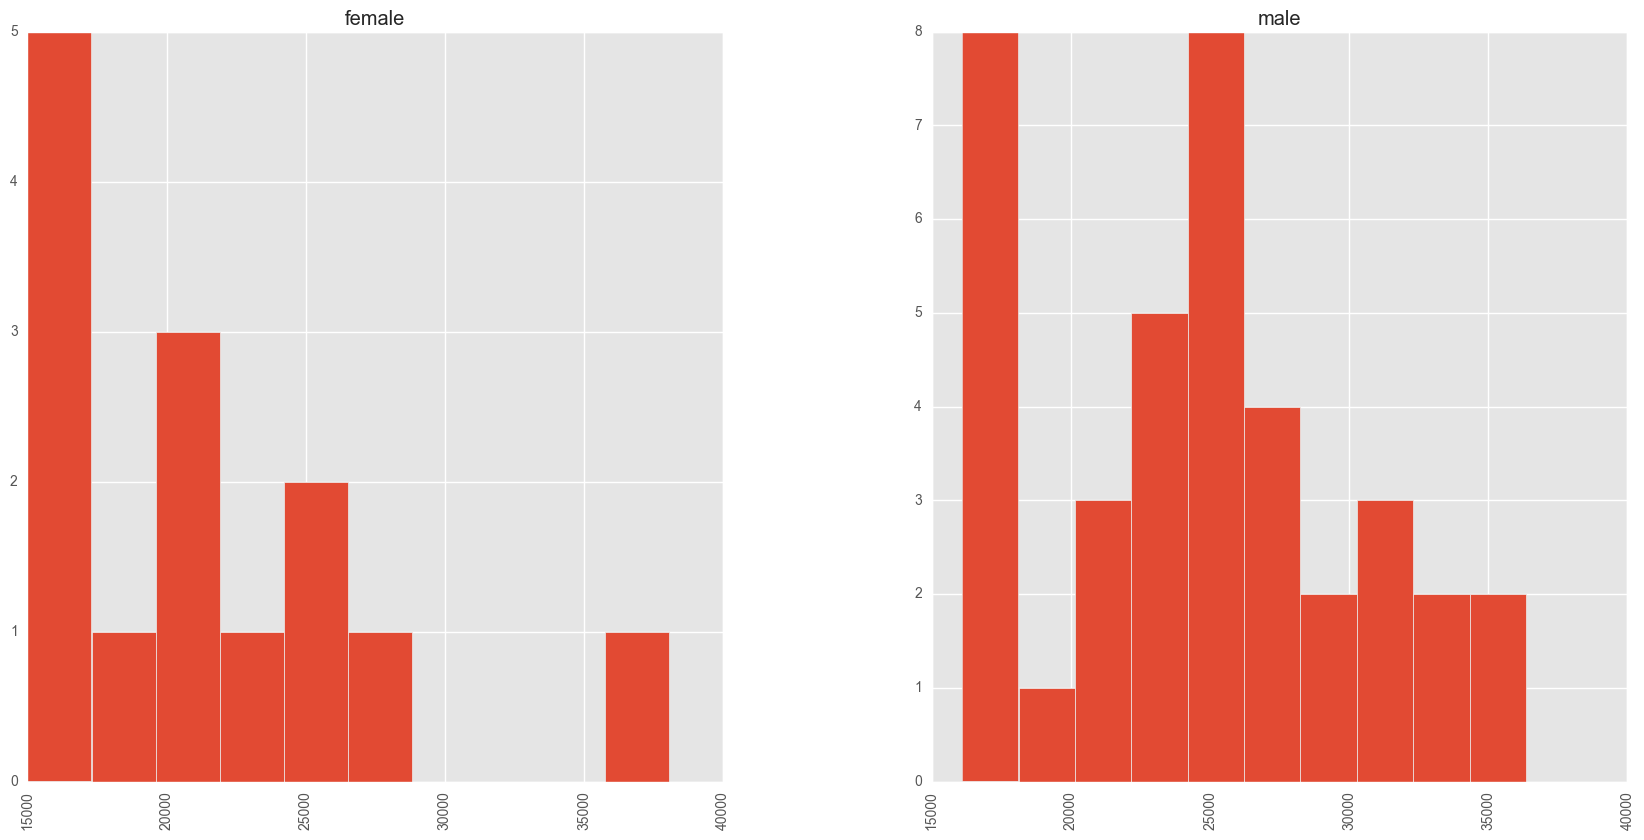

In [8]:
# Draw histograms for the distribution of salaries for males and females (separately)
df['sl'].hist(by=df['sx'], sharex=True, figsize=(20,10))

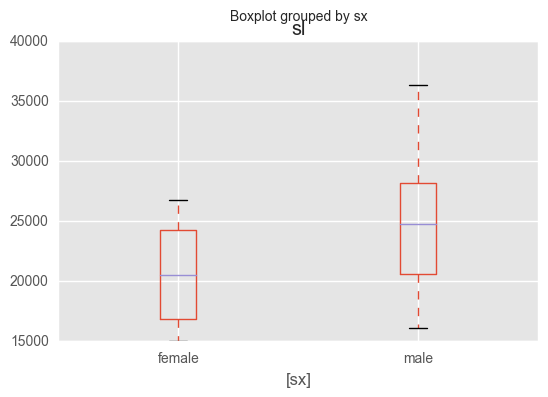

In [9]:
# View distributions in a boxplot
df[['sx', 'sl']].boxplot(by='sx')

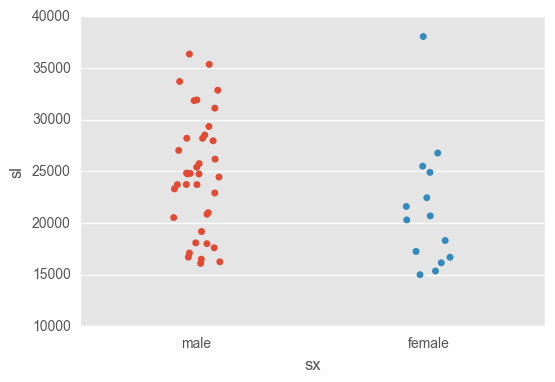

In [13]:
# Show salary distributions for males and females in a stripplot (sns.stripplot)
sns.stripplot(x="sx", y="sl", data=df, jitter=True);

## Test for a difference in means by gender
Use a t-test to see if there is a significant difference in means

In [8]:
# Separate into different arrays by sex


In [9]:
# Test for difference


## Descriptive Statistics by Rank

In [10]:
# Draw histograms for the distribution of salaries by rank


## Test for differences in means by rank

First, we'll want to leverage the **t-test** to test for differences by rank. To do this, we'll need to first break the dataset into two groups (full professors, not-full professors), then perform our t-test.

In [11]:
# Separate into different arrays by rank


# Test for difference


Alternatively, we could use an **Analysis of Variance (ANOVA)** test to assess the statistical significance in differences across multiple groups (an extension of the t-test)

In [12]:
# Use the ANOVA method to test for differences in means across multiple groups


## How does salary (`sl`) compare to years since degress (`yd`) and years in current rank (`yr`)?

In [13]:
# Create scatterplots to show how salary compares to years since degree / in current rank


## How does salary vary across rank and sex?

In [14]:
# Create stripplots of salary by sex and by rank placed next to one another


In [15]:
# Create different stripplots of salary (by gender) for each rank
